/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/318373860.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.groupby("city").apply(lambda group: group.fillna(method="ffill")).reset_index(drop=True)
/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/318373860.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("city").apply(lambda group: group.fillna(method="ffill")).reset_index(drop=True)


Correlation with total_cases:
total_cases                              1.000000
reanalysis_min_air_temp_k                0.325222
station_min_temp_c                       0.264639
reanalysis_air_temp_k                    0.262753
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.148120
reanalysis_dew_point_temp_k              0.138729
reanalysis_specific_humidity_g_per_kg    0.126061
station_avg_temp_c                       0.113445
reanalysis_precip_amt_kg_per_m2         -0.011605
station_max_temp_c                      -0.040772
precipitation_amt_mm                    -0.041801
reanalysis_sat_precip_amt_mm            -0.041801
station_precip_mm                       -0.073901
reanalysis_relative_humidity_percent    -0.134470
ndvi_sw                                 -0.145441
ndvi_nw                                 -0.167659
reanalysis_max_air_temp_k               -0.193436
ndvi_ne                                 -0.205673
ndvi_se             

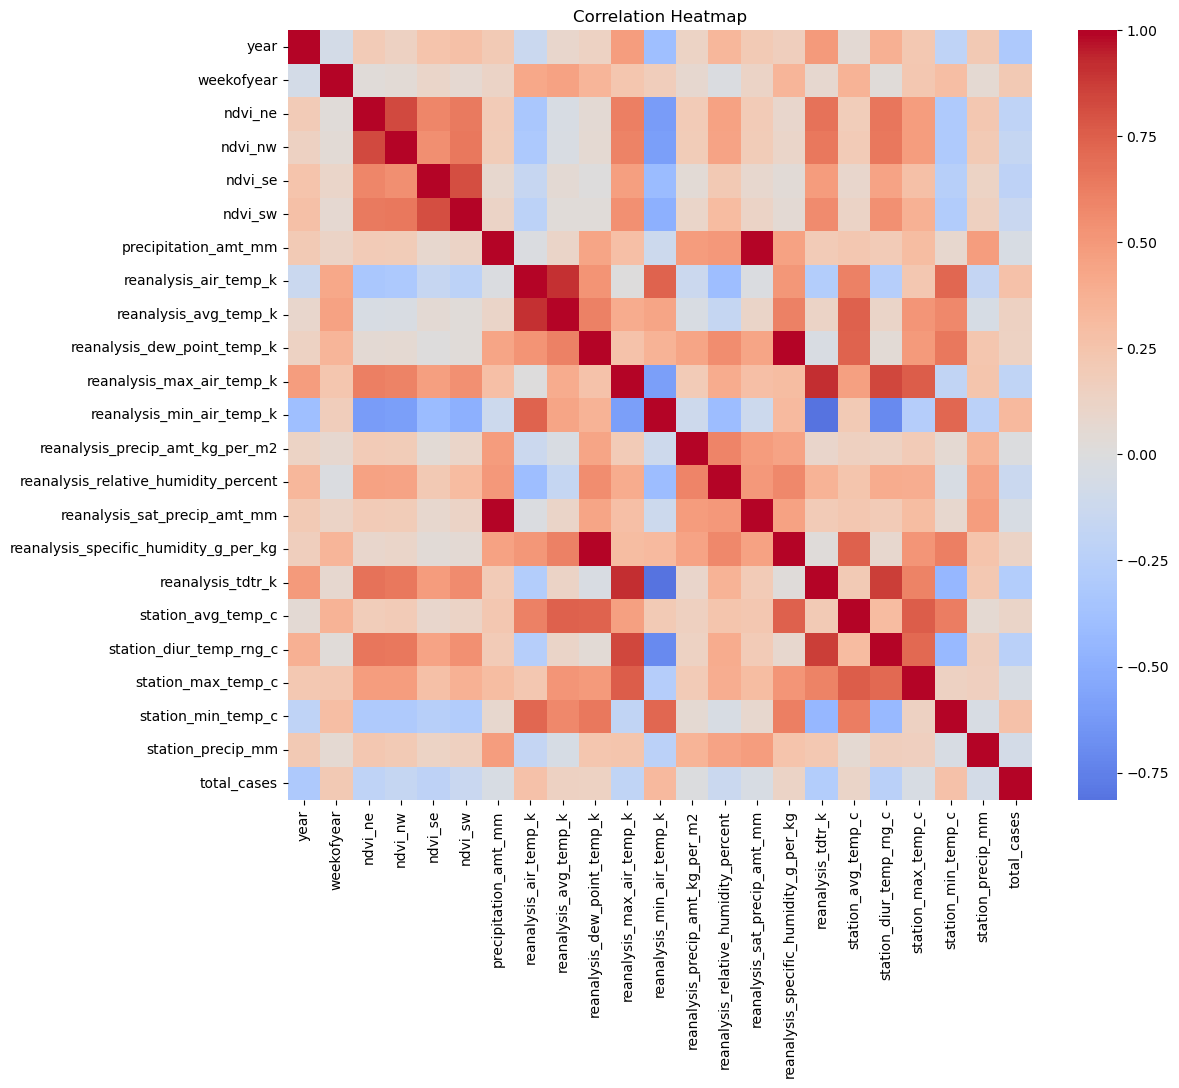

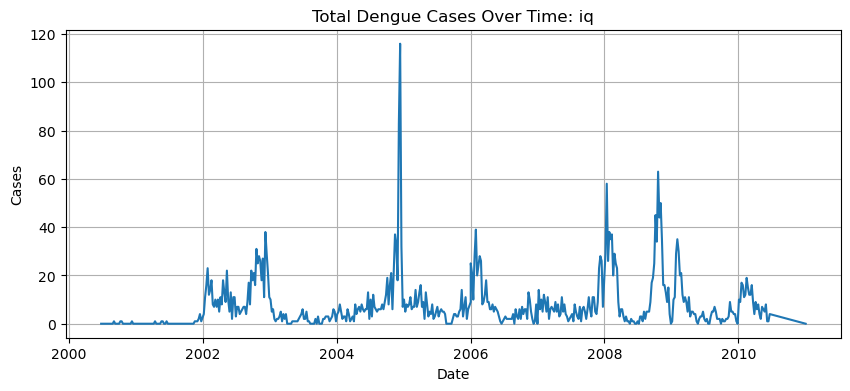

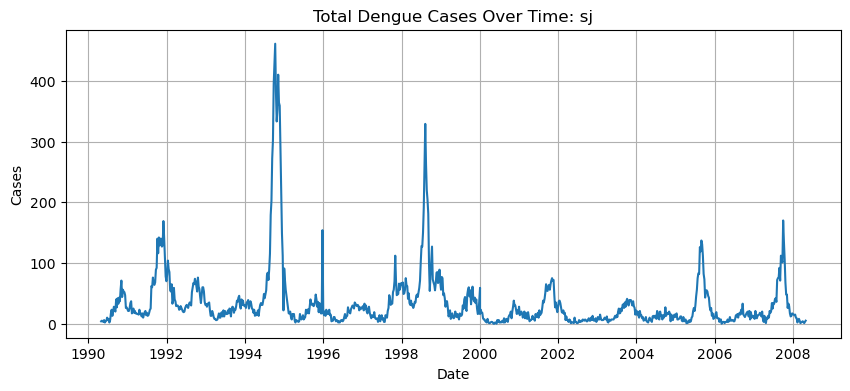

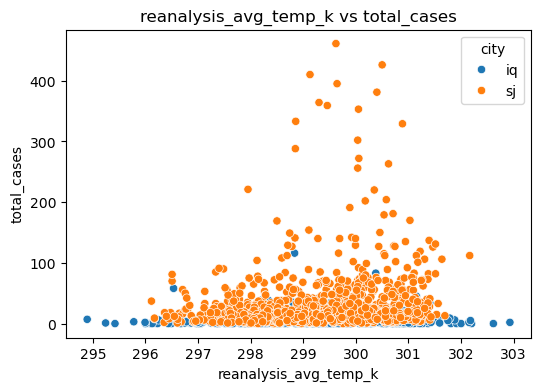

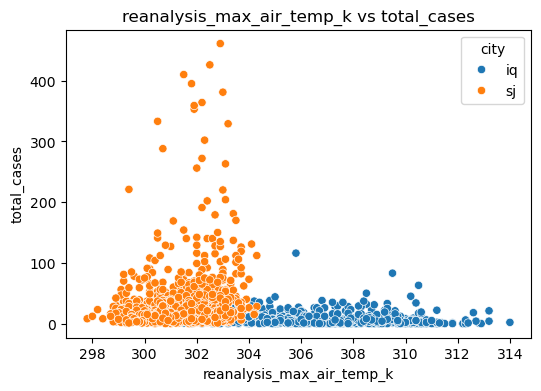

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LASSO MAE: 19.98, RMSE: 35.46
Random Forest MAE: 11.83, RMSE: 24.00
XGBoost MAE: 10.95, RMSE: 21.38
GLMM MAE: 17.79, RMSE: 33.07


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Load Data
features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
labels = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv")

# 2. Merge
data = pd.merge(features, labels, on=["city", "year", "weekofyear"])
data.sort_values(["city", "year", "weekofyear"], inplace=True)

# 3. Fill missing values with forward fill by city
data = data.groupby("city").apply(lambda group: group.fillna(method="ffill")).reset_index(drop=True)

# 4. EDA
print("Correlation with total_cases:")
print(data.corr(numeric_only=True)["total_cases"].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Fix date conversion from year/weekofyear to date
def iso_to_date(year, week):
    return datetime.strptime(f"{year}-W{int(week):02d}-1", "%Y-W%W-%w")

# Plot time vs cases for each city
for city in data["city"].unique():
    subset = data[data["city"] == city].copy()
    subset["date"] = subset.apply(lambda row: iso_to_date(row["year"], row["weekofyear"]), axis=1)
    plt.figure(figsize=(10, 4))
    plt.plot(subset["date"], subset["total_cases"])
    plt.title(f"Total Dengue Cases Over Time: {city}")
    plt.xlabel("Date")
    plt.ylabel("Cases")
    plt.grid(True)
    plt.show()

# Plot temperature vs cases
for temp_feature in ["reanalysis_avg_temp_k", "reanalysis_max_air_temp_k"]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=temp_feature, y="total_cases", hue="city")
    plt.title(f"{temp_feature} vs total_cases")
    plt.show()

# 5. Drop columns with too much missingness or low variance
na_thresh = 0.3  # drop if >30% NA
drop_cols = data.columns[data.isnull().mean() > na_thresh].tolist()
data.drop(columns=drop_cols, inplace=True)

# Drop non-numeric + ID columns
data.drop(columns=["week_start_date"], inplace=True)

# Encode 'city'
data = pd.get_dummies(data, columns=["city"], drop_first=True)

Correlation with total_cases:
total_cases                              1.000000
reanalysis_min_air_temp_k                0.325222
city_sj                                  0.292624
station_min_temp_c                       0.264639
reanalysis_air_temp_k                    0.262753
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.148120
reanalysis_dew_point_temp_k              0.138729
reanalysis_specific_humidity_g_per_kg    0.126061
station_avg_temp_c                       0.113445
reanalysis_precip_amt_kg_per_m2         -0.011605
station_max_temp_c                      -0.040772
precipitation_amt_mm                    -0.041801
reanalysis_sat_precip_amt_mm            -0.041801
station_precip_mm                       -0.073901
reanalysis_relative_humidity_percent    -0.134470
ndvi_sw                                 -0.145441
ndvi_nw                                 -0.167659
reanalysis_max_air_temp_k               -0.193436
ndvi_ne             

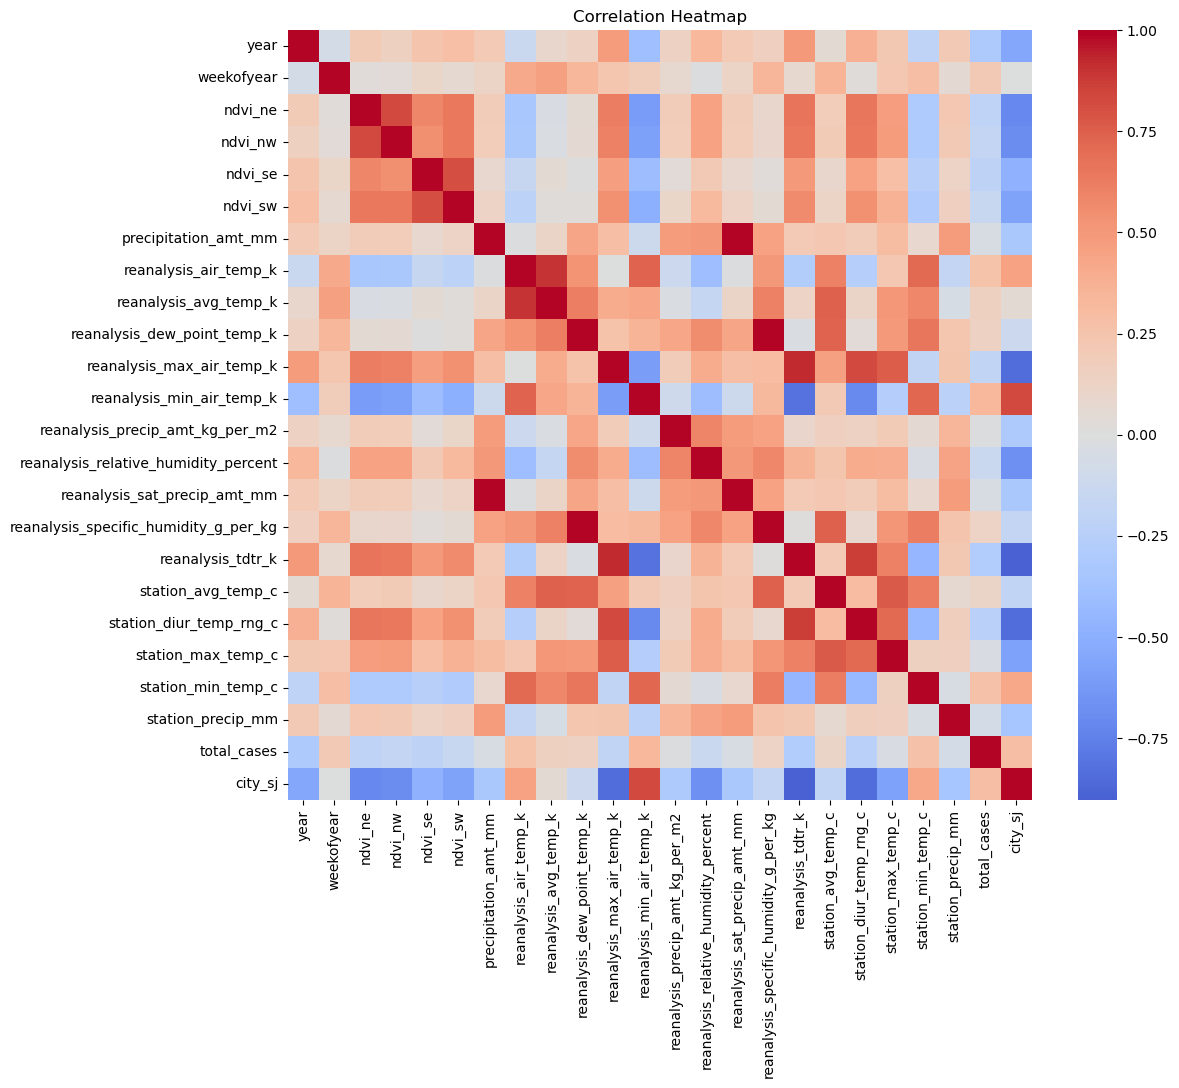

In [ ]:
X = data.drop(columns=["total_cases"])
y = data["total_cases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Models and Evaluation
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"{name} MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# LASSO
lasso = LassoCV(cv=5)
evaluate_model(lasso, "LASSO")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
evaluate_model(xgb, "XGBoost")

# GLMM (Poisson)
X_glmm = X.copy()
X_glmm["total_cases"] = y
formula = "total_cases ~ " + " + ".join(X_glmm.columns.difference(["total_cases"]))
model_glmm = smf.glm(formula=formula, data=X_glmm, family=sm.families.Poisson()).fit()
preds_glmm = model_glmm.predict(X_test)
mae_glmm = mean_absolute_error(y_test, preds_glmm)
rmse_glmm = mean_squared_error(y_test, preds_glmm, squared=False)
print(f"GLMM MAE: {mae_glmm:.2f}, RMSE: {rmse_glmm:.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LASSO MAE: 19.98, RMSE: 35.46
Random Forest MAE: 11.83, RMSE: 24.00
XGBoost MAE: 10.95, RMSE: 21.38
GLMM MAE: 17.79, RMSE: 33.07


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# --- Remove highly correlated features ---
corr_matrix = data.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Dropping highly correlated features:", high_corr_features)
data.drop(columns=high_corr_features, inplace=True)


Dropping highly correlated features: ['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'city_sj']


In [ ]:
corr_matrix = data.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Dropping highly correlated features:", high_corr_features)
data.drop(columns=high_corr_features, inplace=True)

# 6. Split into train/test sets
X = data.drop(columns=["total_cases"])
y = data["total_cases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Model Evaluation Function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"{name} MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 8. LASSO
lasso = LassoCV(cv=5)
evaluate_model(lasso, "LASSO")

# 9. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")

# 10. XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
evaluate_model(xgb, "XGBoost")

# 11. GLMM (Poisson)
X_glmm = X.copy()
X_glmm["total_cases"] = y
formula = "total_cases ~ " + " + ".join(X_glmm.columns.difference(["total_cases"]))
model_glmm = smf.glm(formula=formula, data=X_glmm, family=sm.families.Poisson()).fit()
preds_glmm = model_glmm.predict(X_test)
mae_glmm = mean_absolute_error(y_test, preds_glmm)
rmse_glmm = mean_squared_error(y_test, preds_glmm, squared=False)
print(f"GLMM MAE: {mae_glmm:.2f}, RMSE: {rmse_glmm:.2f}")

Dropping highly correlated features: []
LASSO MAE: 19.93, RMSE: 35.52


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest MAE: 11.71, RMSE: 23.95
XGBoost MAE: 10.89, RMSE: 21.75
GLMM MAE: 17.88, RMSE: 33.38


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
def evaluate_model_full(model, name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)

    print(f"\n{name} Performance:")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    return {
        "Model": name,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse
    }


In [ ]:
results = []

results.append(evaluate_model_full(LassoCV(cv=5), "LASSO"))
results.append(evaluate_model_full(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"))
results.append(evaluate_model_full(XGBRegressor(n_estimators=100, random_state=42), "XGBoost"))

# GLMM (Poisson)
model_glmm = smf.glm(formula=formula, data=X_glmm, family=sm.families.Poisson()).fit()
train_preds_glmm = model_glmm.predict(X_train)
test_preds_glmm = model_glmm.predict(X_test)

results.append({
    "Model": "GLMM",
    "Train MAE": mean_absolute_error(y_train, train_preds_glmm),
    "Test MAE": mean_absolute_error(y_test, test_preds_glmm),
    "Train RMSE": mean_squared_error(y_train, train_preds_glmm, squared=False),
    "Test RMSE": mean_squared_error(y_test, test_preds_glmm, squared=False),
})


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



LASSO Performance:
Train MAE: 21.06, Test MAE: 19.93
Train RMSE: 40.86, Test RMSE: 35.52

Random Forest Performance:
Train MAE: 4.36, Test MAE: 11.71
Train RMSE: 7.88, Test RMSE: 23.95

XGBoost Performance:
Train MAE: 0.22, Test MAE: 10.89
Train RMSE: 0.32, Test RMSE: 21.75


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your files
features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
labels = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv")

# Merge and sort
data = pd.merge(features, labels, on=["city", "year", "weekofyear"])
data.sort_values(["city", "year", "weekofyear"], inplace=True)

# Forward-fill by city
data = data.groupby("city").apply(lambda df: df.fillna(method="ffill")).reset_index(drop=True)

# Drop columns with too many missing values or identifiers
na_thresh = 0.3
data.drop(columns=data.columns[data.isnull().mean() > na_thresh], inplace=True)
data.drop(columns=["week_start_date"], inplace=True)

# Encode categorical and reduce correlation
data = pd.get_dummies(data, columns=["city"], drop_first=True)
corr_matrix = data.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
data.drop(columns=high_corr, inplace=True)

# Split into X and y
X = data.drop(columns=["total_cases"])
y = data["total_cases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "LASSO": LassoCV(cv=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10,
                                           min_samples_leaf=5, max_features='sqrt', random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5,
                            min_child_weight=3, subsample=0.8, colsample_bytree=0.8,
                            reg_alpha=1.0, reg_lambda=1.0, random_state=42)
}

# Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    results.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train, train_preds),
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Train RMSE": mean_squared_error(y_train, train_preds, squared=False),
        "Test RMSE": mean_squared_error(y_test, test_preds, squared=False)
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)



/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/1239564252.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.groupby("city").apply(lambda df: df.fillna(method="ffill")).reset_index(drop=True)
/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/1239564252.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("city").apply(lambda df: df.fillna(method="ffill")).reset_index(drop=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To 

           Model  Train MAE   Test MAE  Train RMSE  Test RMSE
0          LASSO  21.058794  19.929714   40.863507  35.524033
1  Random Forest  10.638070  14.120904   20.809542  28.484103
2        XGBoost   2.302879  11.132108    3.279257  22.456692


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [ ]:
xgb_reg = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=10,
    early_stopping_rounds=50,
    eval_metric="mae"
)

xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predictions
xgb_train_preds = xgb_reg.predict(X_train)
xgb_test_preds = xgb_reg.predict(X_test)

# Evaluation
xgb_train_mae = mean_absolute_error(y_train, xgb_train_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)
xgb_train_rmse = mean_squared_error(y_train, xgb_train_preds, squared=False)
xgb_test_rmse = mean_squared_error(y_test, xgb_test_preds, squared=False)

print(f"XGBoost (Regularized):")
print(f"Train MAE: {xgb_train_mae:.2f}, Test MAE: {xgb_test_mae:.2f}")
print(f"Train RMSE: {xgb_train_rmse:.2f}, Test RMSE: {xgb_test_rmse:.2f}")


XGBoost (Regularized):
Train MAE: 9.22, Test MAE: 12.08
Train RMSE: 16.00, Test RMSE: 25.31


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

# Load and merge original data
features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
labels = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv")
data_orig = pd.merge(features, labels, on=["city", "year", "weekofyear"])

# Sort by time
data_orig.sort_values(["city", "year", "weekofyear"], inplace=True)

# Safely forward-fill without triggering DeprecationWarning
city_col = data_orig["city"].copy()
data_numeric = data_orig.drop(columns=["city"])
data_filled = data_numeric.groupby(city_col, group_keys=False).apply(lambda df: df.ffill())
data_filled["city"] = city_col.values

# Drop high-NA columns and non-numeric identifiers
na_thresh = 0.3
data_filled.drop(columns=data_filled.columns[data_filled.isnull().mean() > na_thresh], inplace=True)
data_filled.drop(columns=["week_start_date"], inplace=True)

# Create lag feature (1-week lag in total_cases, grouped by city)
data_filled["lag1_cases"] = data_filled.groupby("city")["total_cases"].shift(1)
data_filled.dropna(inplace=True)

# One-hot encode 'city'
data_filled = pd.get_dummies(data_filled, columns=["city"], drop_first=True)

# Drop highly correlated features
corr_matrix = data_filled.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
data_filled.drop(columns=high_corr_cols, inplace=True)

# Final X and y
X_lagged = data_filled.drop(columns=["total_cases"])
y_lagged = data_filled["total_cases"]

# Time-based train/test split (70/30)
split_index = int(len(X_lagged) * 0.7)
X_train_lag = X_lagged.iloc[:split_index]
X_test_lag = X_lagged.iloc[split_index:]
y_train_lag = y_lagged.iloc[:split_index]
y_test_lag = y_lagged.iloc[split_index:]



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Initialize models
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

ridge_model = Ridge(alpha=10)

# Evaluation container
results = []

# Define evaluation function
def evaluate_model(model, name):
    model.fit(X_train_lag, y_train_lag)
    train_preds = model.predict(X_train_lag)
    test_preds = model.predict(X_test_lag)
    results.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train_lag, train_preds),
        "Test MAE": mean_absolute_error(y_test_lag, test_preds),
        "Train RMSE": mean_squared_error(y_train_lag, train_preds, squared=False),
        "Test RMSE": mean_squared_error(y_test_lag, test_preds, squared=False)
    })

# Evaluate Random Forest and Ridge
evaluate_model(rf_model, "Random Forest")
evaluate_model(ridge_model, "Ridge Regression")

# Append previously computed XGBoost results
results.append({
    "Model": "XGBoost (Lag + TimeSplit)",
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
})

# Convert to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Train MAE   Test MAE  Train RMSE  Test RMSE
0              Random Forest  10.782487  27.399795   20.943484  31.900302
1           Ridge Regression  21.869491  33.752308   43.796252  37.153538
2  XGBoost (Lag + TimeSplit)  25.793927  19.407376   49.258523  24.932169


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Copy previous lagged DataFrame
df_lagged = data_filled.copy()

# Reconstruct 'city' group info for lagging
df_lagged["city_group"] = "iq" if "city_iq" in df_lagged.columns else "sj"

# Add lag features
df_lagged["lag2_cases"] = df_lagged.groupby("city_group")["total_cases"].shift(2)
df_lagged["lag3_cases"] = df_lagged.groupby("city_group")["total_cases"].shift(3)
df_lagged.drop(columns=["city_group"], inplace=True)
df_lagged.dropna(inplace=True)

# Time-based split
X_lagged_multi = df_lagged.drop(columns=["total_cases"])
y_lagged_multi = df_lagged["total_cases"]
split_idx = int(len(X_lagged_multi) * 0.7)
X_train_multi = X_lagged_multi.iloc[:split_idx]
X_test_multi = X_lagged_multi.iloc[split_idx:]
y_train_multi = y_lagged_multi.iloc[:split_idx]
y_test_multi = y_lagged_multi.iloc[split_idx:]

# Models
xgb_multi = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=10,
    early_stopping_rounds=50,
    eval_metric="mae",
    random_state=42
)

rf_multi = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

ridge_multi = Ridge(alpha=10)

# Results container
results_multi = []

# Evaluate Random Forest
rf_multi.fit(X_train_multi, y_train_multi)
results_multi.append({
    "Model": "Random Forest (Lag1-3)",
    "Train MAE": mean_absolute_error(y_train_multi, rf_multi.predict(X_train_multi)),
    "Test MAE": mean_absolute_error(y_test_multi, rf_multi.predict(X_test_multi)),
    "Train RMSE": mean_squared_error(y_train_multi, rf_multi.predict(X_train_multi), squared=False),
    "Test RMSE": mean_squared_error(y_test_multi, rf_multi.predict(X_test_multi), squared=False)
})

# Evaluate Ridge
ridge_multi.fit(X_train_multi, y_train_multi)
results_multi.append({
    "Model": "Ridge Regression (Lag1-3)",
    "Train MAE": mean_absolute_error(y_train_multi, ridge_multi.predict(X_train_multi)),
    "Test MAE": mean_absolute_error(y_test_multi, ridge_multi.predict(X_test_multi)),
    "Train RMSE": mean_squared_error(y_train_multi, ridge_multi.predict(X_train_multi), squared=False),
    "Test RMSE": mean_squared_error(y_test_multi, ridge_multi.predict(X_test_multi), squared=False)
})

# Evaluate XGBoost (with validation set)
xgb_multi.fit(X_train_multi, y_train_multi, eval_set=[(X_test_multi, y_test_multi)], verbose=False)
results_multi.append({
    "Model": "XGBoost (Lag1-3)",
    "Train MAE": mean_absolute_error(y_train_multi, xgb_multi.predict(X_train_multi)),
    "Test MAE": mean_absolute_error(y_test_multi, xgb_multi.predict(X_test_multi)),
    "Train RMSE": mean_squared_error(y_train_multi, xgb_multi.predict(X_train_multi), squared=False),
    "Test RMSE": mean_squared_error(y_test_multi, xgb_multi.predict(X_test_multi), squared=False)
})

# Final result table
results_df_multi = pd.DataFrame(results_multi)
print(results_df_multi)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

                       Model  Train MAE   Test MAE  Train RMSE  Test RMSE
0     Random Forest (Lag1-3)   6.680484  10.544707   15.158454  14.178725
1  Ridge Regression (Lag1-3)   9.754908   8.038412   19.711770  11.840746
2           XGBoost (Lag1-3)   7.302730   7.549099   14.175822  12.519561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd

# Load test features and submission template
test_features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")
submission_format = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv")

# Prepare test data
test_features.sort_values(["city", "year", "weekofyear"], inplace=True)
test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())

# Drop high-NA columns and non-numeric
na_thresh = 0.3
test_features.drop(columns=test_features.columns[test_features.isnull().mean() > na_thresh], inplace=True)
if "week_start_date" in test_features.columns:
    test_features.drop(columns=["week_start_date"], inplace=True)

# One-hot encode city
test_features = pd.get_dummies(test_features, columns=["city"], drop_first=True)

# Add lag columns as 0 (placeholder — we don't have true lags for test set)
for lag in ["lag1_cases", "lag2_cases", "lag3_cases"]:
    test_features[lag] = 0

# Add missing columns that existed in training
for col in X_train_multi.columns:
    if col not in test_features.columns:
        test_features[col] = 0
test_features = test_features[X_train_multi.columns]

# Predict
preds = xgb_multi.predict(test_features)

# Create submission
submission = submission_format.copy()
submission["total_cases"] = preds.round().astype(int)

# Save to CSV
submission.to_csv("predicted_submission.csv", index=False)
print("✅ Prediction saved to: predicted_submission.csv")


✅ Prediction saved to: predicted_submission.csv


/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/3477162088.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())


In [ ]:
import pandas as pd
import joblib

# Load expected feature list saved during training
required_cols = joblib.load("xgb_features.pkl")

# Load test data and submission format
test_features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")
submission_format = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv")

# Sort chronologically and forward-fill missing values
test_features.sort_values(["city", "year", "weekofyear"], inplace=True)
test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())

# Drop high-NA columns and unnecessary ones
na_thresh = 0.3
test_features.drop(columns=test_features.columns[test_features.isnull().mean() > na_thresh], inplace=True)
if "week_start_date" in test_features.columns:
    test_features.drop(columns=["week_start_date"], inplace=True)

# One-hot encode city
test_features = pd.get_dummies(test_features, columns=["city"], drop_first=True)

# Add only the lag columns that were in training
# First detect what lags were in training
lag_cols = [col for col in ["lag1_cases", "lag2_cases", "lag3_cases"] if col in required_cols]
for lag in lag_cols:
    test_features[lag] = 0.0

# Drop any unexpected extra columns
test_features = test_features[[col for col in required_cols if col in test_features.columns]]

# Fill in any missing columns with 0
for col in required_cols:
    if col not in test_features.columns:
        test_features[col] = 0
test_features = test_features[required_cols]

# Rolling prediction
predictions = []
lag_buffer = {"sj": [0.0, 0.0, 0.0], "iq": [0.0, 0.0, 0.0]}

# Use actual city labels from submission format
city_labels = submission_format["city"].values

for i in range(len(test_features)):
    row = test_features.iloc[i].copy()
    city = city_labels[i]

    # Insert only those lag values that were used in training
    if "lag1_cases" in row:
        row["lag1_cases"] = lag_buffer[city][0]
    if "lag2_cases" in row:
        row["lag2_cases"] = lag_buffer[city][1]
    if "lag3_cases" in row:
        row["lag3_cases"] = lag_buffer[city][2]

    # Predict
    pred = xgb_multi.predict(pd.DataFrame([row]))[0]
    pred = max(0, round(pred))  # avoid negatives
    lag_buffer[city] = [pred] + lag_buffer[city][:2]  # update lags
    predictions.append(pred)

# Build and save submission
submission = submission_format.copy()
submission["total_cases"] = predictions
submission.to_csv("rolling_predicted_submission.csv", index=False)
print("✅ Saved: rolling_predicted_submission.csv")


/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/2765047029.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())


✅ Saved: rolling_predicted_submission.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Drop lag columns if they exist
X_rf_simple = X_train.drop(columns=[col for col in X_train.columns if "lag" in col])
X_test_rf_simple = X_test.drop(columns=[col for col in X_test.columns if "lag" in col])

# Train Random Forest
rf_simple = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_simple.fit(X_rf_simple, y_train)

# Evaluate on test set
train_preds = rf_simple.predict(X_rf_simple)
test_preds = rf_simple.predict(X_test_rf_simple)

print("✅ Random Forest (No Lags)")
print("Train MAE:", mean_absolute_error(y_train, train_preds))
print("Test MAE:", mean_absolute_error(y_test, test_preds))
print("Train RMSE:", mean_squared_error(y_train, train_preds, squared=False))
print("Test RMSE:", mean_squared_error(y_test, test_preds, squared=False))


✅ Random Forest (No Lags)
Train MAE: 5.337202450191524
Test MAE: 11.792569716364618
Train RMSE: 8.594739563405891
Test RMSE: 24.107483893328567


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reuse no-lag train/test data
X_rf_simple = X_train.drop(columns=[col for col in X_train.columns if "lag" in col])
X_test_rf_simple = X_test.drop(columns=[col for col in X_test.columns if "lag" in col])

# Regularized RF model
rf_regularized = RandomForestRegressor(
    n_estimators=150,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)

# Fit
rf_regularized.fit(X_rf_simple, y_train)

# Predict
train_preds = rf_regularized.predict(X_rf_simple)
test_preds = rf_regularized.predict(X_test_rf_simple)

# Evaluate
print("✅ Regularized Random Forest (No Lags)")
print("Train MAE:", mean_absolute_error(y_train, train_preds))
print("Test MAE:", mean_absolute_error(y_test, test_preds))
print("Train RMSE:", mean_squared_error(y_train, train_preds, squared=False))
print("Test RMSE:", mean_squared_error(y_test, test_preds, squared=False))


✅ Regularized Random Forest (No Lags)
Train MAE: 12.49100539410397
Test MAE: 14.402988376411287
Train RMSE: 22.78663292155886
Test RMSE: 28.916070300108892


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load training features (X_train, X_test, y_train must already be defined)

# Prepare training data without lag features
X_train_nolag = X_train.drop(columns=[col for col in X_train.columns if "lag" in col], errors='ignore')
X_test_nolag = X_test.drop(columns=[col for col in X_test.columns if "lag" in col], errors='ignore')
y_train_nolag = y_train

# Train regularized Random Forest
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
rf_model.fit(X_train_nolag, y_train_nolag)

# Load and prepare test features
test_features = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")
submission_format = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv")

test_features.sort_values(["city", "year", "weekofyear"], inplace=True)
test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())
test_features.drop(columns=test_features.columns[test_features.isnull().mean() > 0.3], inplace=True)
if "week_start_date" in test_features.columns:
    test_features.drop(columns=["week_start_date"], inplace=True)

test_features = pd.get_dummies(test_features, columns=["city"], drop_first=True)

# Align with training columns
for col in X_train_nolag.columns:
    if col not in test_features.columns:
        test_features[col] = 0
test_features = test_features[X_train_nolag.columns]

# Predict
rf_preds = rf_model.predict(test_features)

# Build submission
submission = submission_format.copy()
submission["total_cases"] = rf_preds.round().astype(int)
submission.to_csv("rf_regularized_submission.csv", index=False)

print("✅ Saved submission: rf_regularized_submission.csv")


✅ Saved submission: rf_regularized_submission.csv


/var/folders/gp/6yrz6lk90p9fh8sy2bz0lllc0000gn/T/ipykernel_87382/3170074768.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_features = test_features.groupby("city", group_keys=False).apply(lambda df: df.ffill())


In [ ]:
import pandas as pd

submission = pd.read_csv("/users/yubeiming/rf_regularized_submission.csv")
cap_threshold = submission["total_cases"].quantile(0.95)
submission["total_cases"] = submission["total_cases"].clip(upper=cap_threshold)
submission["total_cases"] = submission["total_cases"].round().astype(int)
submission.to_csv("rf_quantile_capped_submission.csv", index=False)
print(f"✅ Capped at 95th percentile ({cap_threshold:.2f}) and saved.")


✅ Capped at 95th percentile (49.00) and saved.
